# LSN Esercizi lezione 9
Gloria Senatore 931644

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

### Esercizio 9.1

#### Svolgimento

L'esercizio prevede la scrittura di un algoritmo genetico per la risoluzione del problema del commesso viaggiatore con $32$ città poste su una circonferenza e altrettante sulla superficie di un quadrato.

Di seguito la descrizione del codice:

Nel file *esercizio9.cpp*, dopo aver riempito il vettore *cities* contenente le città poste casualmente sulla circonferenza (a tal fine settare la variabile *square* a *false*) o dentro il perimetro del quadrato (settare *square* a *true*), si inizializza la classe *Population* con il numero di individui della popolazione e con il vettore delle città. Ad ogni città, ossia coppie di coordinate nel piano, è associato un numero. Ogni individuo è un vettore di $32$ numeri indicanti le città, nell'ordine in cui vengono visitate dal commesso viaggiatore. Si noti che il vettore delle città non cambia mai, è solo l'ordine dei numeri all'interno degli individui a cambiare.

Viene creata la *starting population* con il metodo omonimo. In esso, il primo individuo, costituito dalle città poste in ordine rispetto a come sono nel vettore città, quindi $[0, 1, 2, ..., 31]$, viene sottoposto all'operatore *PairPermutation(vector G)*, che crea un nuovo individuo scambiando casualmente due città nell'individuo precedente eccetto la prima, fino a costituire una popolazione. Tale popolazione viene ordinata con il metodo *SortingPopulation()*, che aggiunge alla fine di ogni individuo il valore della sua lunghezza in norma quadra e ordina gli individui in ordine crescente di tale lunghezza.

Il metodo che performa una iterazione dell'algoritmo genetico si chiama *Iteration()*. In esso il crossover viene chiamato con probabilità del $60\%$. Il crossover seleziona l'individuo $j = int(M r^{10})$, con $M$ numero di individui nella popolazione ed $r$ uniformemente distribuito tra $0$ e $1$, in modo che sia più probabile scegliere il primo individuo della popolazione ordinata. Selezionati i genitori, vengono costruiti due figli incrociando il patrimonio genetico dei genitori in un punto scelto casualmente tra seconda e penultima città del loro genoma. L'algoritmo genetico scelto è dunque uno *steady-state*, perché solo alcuni individui vengono sostituiti nella nuova generazione. Il crossover non è distruttivo, infatti i genitori vengono conservati nella nuova popolazione, e i figli, se generati, vengono sostituiti agli individui peggiori della popolazione.

Ai figli vengono applicati gli operatori di mutazione, che sono distruttivi quando agiscono. Essi sono:
- *pair permutation*: spiegato sopra con la differenza che ora è distruttivo, viene applicato con probabilità del $10\%$
- *permutation*: scambia due gruppi di città contigue, scelti tra la prima e la seconda metà dell'individui, viene applicato con probabilità del $5\%$
- *inversion*: inverte l'ordine di alcune città contigue, viene applicato con probabilità del $10\%$

Dopo la creazione di un nuovo individuo, con la funzione di verifica si controlla che non sia ripetuta alcuna città e che la prima sia sempre al primo posto. Se il file *problems.dat* rimane sempre vuoto eseguendo il programma, significa che non sono stati creati individui difettosi.
Alla fine il metodo *Iteration()* ordina la popolazione per la successiva iterazione.

#### Risultati

Di seguito si riportano le immagini dei migliori percorsi e i grafici della lunghezza del percorso migliore e della media delle lunghezze della prima metà della popolazione in funzione del numero di iterazioni. Tutte le lunghezze sono espresse in norma quadra.

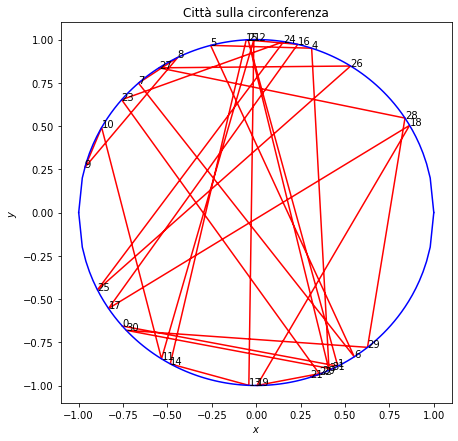

In [8]:
plt.figure(figsize=(7,7))
x = np.loadtxt("cities.dat", usecols=0)
y = np.loadtxt("cities.dat", usecols=1)
n = np.arange(0,32)
t = np.linspace(-1,1,100)
plt.plot(x,y, color='red')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))
plt.plot(t, np.sqrt(1-t**2), color='blue')
plt.plot(t, -np.sqrt(1-t**2), color='blue')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Città sulla circonferenza")
plt.grid(False)
plt.show()

L'immagine rappresenta il primo percorso creato sulla circonferenza. Chiaramente non è il percorso migliore.

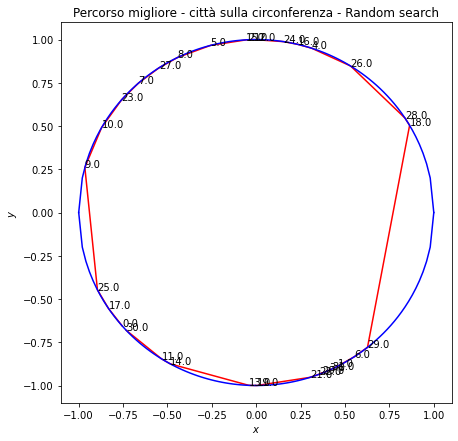

Lunghezza del percorso migliore:
3.17171


In [9]:
plt.figure(figsize=(7,7))
x = np.loadtxt("bestpath_rs.dat", usecols=0)
y = np.loadtxt("bestpath_rs.dat", usecols=1)
c = np.loadtxt("bestpath_rs.dat", usecols=2)
t = np.linspace(-1,1,100)
plt.plot(x,y, color='red')
for i, txt in enumerate(c):
    plt.annotate(txt, (x[i], y[i]))
plt.plot(t, np.sqrt(1-t**2), color='blue')
plt.plot(t, -np.sqrt(1-t**2), color='blue')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Percorso migliore - città sulla circonferenza - Random search")
plt.grid(False)
plt.show()
L = np.loadtxt("bestpath_rs.dat", usecols=3, max_rows=1)
print("Lunghezza del percorso migliore:")
print(L)

Prima di procedere con l'algoritmo genetico, si opera un *random search* utilizzando solo gli operatori di mutazioni. Esso sceglie un individuo della popolazione con probabilità uniforme tra tutti gli individui e applica l'operatore *pair permutation* nel $40\%$ dei casi, *permutation* nel $15\%$ e *inversion* il $25\%$ delle volte (le restanti volte chiaramente non viene applicata alcuna mutazione). Con una popolazione di $100$ individui e un numeri di iterazioni pari a $60000$, si ottiene il percorso nell'immagine sopra. É abbastanza buono, infatti non sono presenti vistosi incroci, ma si vede in seguito che non è il migliore.

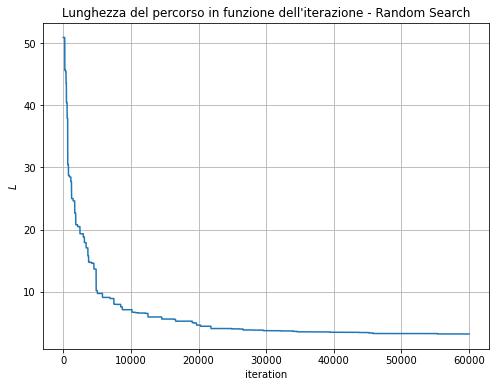

In [18]:
plt.figure(figsize=(8,6))
L = np.loadtxt("bestL_rs.dat")
x = np.arange(0,60001)

plt.plot(x, L)
plt.xlabel('iteration')
plt.ylabel('$L$')
plt.title("Lunghezza del percorso in funzione dell'iterazione - Random Search")
plt.grid(True)
plt.show()

Si riporta l'andamento della lunghezza del percorso migliore con *random search*.

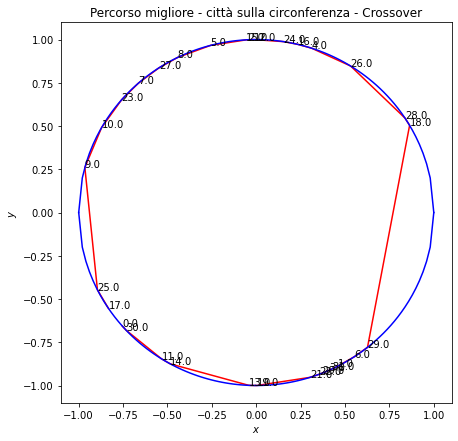

Lunghezza del percorso migliore:
3.16799


In [2]:
plt.figure(figsize=(7,7))
x = np.loadtxt("bestpath.dat", usecols=0)
y = np.loadtxt("bestpath.dat", usecols=1)
c = np.loadtxt("bestpath.dat", usecols=2)
t = np.linspace(-1,1,100)
plt.plot(x,y, color='red')
for i, txt in enumerate(c):
    plt.annotate(txt, (x[i], y[i]))
plt.plot(t, np.sqrt(1-t**2), color='blue')
plt.plot(t, -np.sqrt(1-t**2), color='blue')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Percorso migliore - città sulla circonferenza - Crossover")
plt.grid(False)
plt.show()
L = np.loadtxt("bestpath.dat", usecols=3, max_rows=1)
print("Lunghezza del percorso migliore:")
print(L)

Applicando ora l'algoritmo genetico per $20000$ iterazioni, si ottiene questo percorso. Migliore rispetto al precedente e, sembra, il migliore in assoluto.

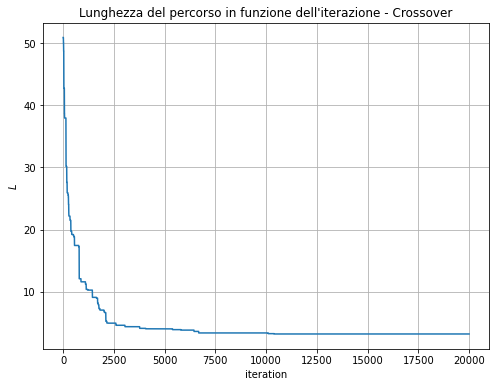

In [16]:
plt.figure(figsize=(8,6))
L = np.loadtxt("bestL.dat")
x = np.arange(0,20001)

plt.plot(x, L)
plt.xlabel('iteration')
plt.ylabel('$L$')
plt.title("Lunghezza del percorso in funzione dell'iterazione - Crossover")
plt.grid(True)
plt.show()

Si grafica l'andamento della lunghezza dell'individuo migliore presente in ogni generazione. L'algoritmo abbatte rapidamente la lunghezza nelle prime iterazioni, per poi trovare un individuo migliore in un numero sempre maggiore di iterazioni. L'algoritmo arriva ad un risultato migliore del *random search* in un minor numero di iterazioni. 

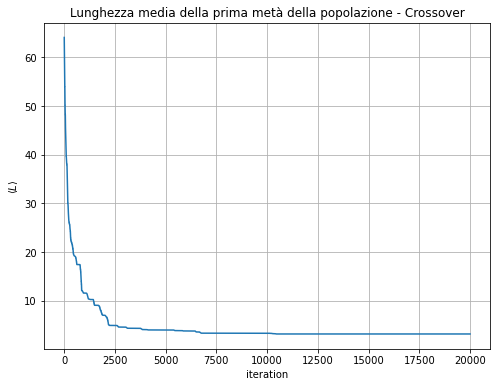

In [15]:
plt.figure(figsize=(8,6))
L = np.loadtxt("bestAveL.dat")
x = np.arange(0,20000)

plt.plot(x, L)
plt.xlabel('iteration')
plt.ylabel(r'$\langle L \rangle$')
plt.title("Lunghezza media della prima metà della popolazione - Crossover")
plt.grid(True)
plt.show()

Il grafico riporta l'andamento della lunghezza della prima metà della popolazione ordinata. Essendo il crossover scelto non distruttivo, il valore medio è uguale al valore del migliore già a partire da poco più di $10000$ iterazioni, cioé per lo meno la prima metà della popolazione è occupata da individui uguali all'individuo migliore.

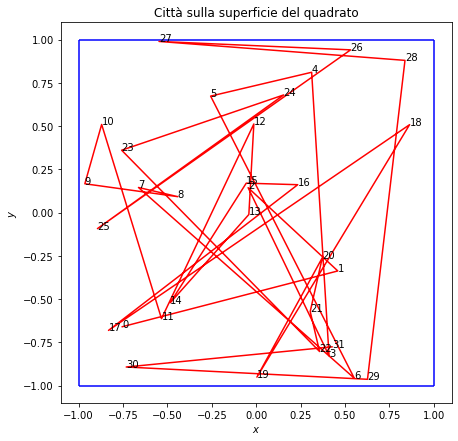

In [10]:
plt.figure(figsize=(7,7))
x = np.loadtxt("cities_square.dat", usecols=0)
y = np.loadtxt("cities_square.dat", usecols=1)
n = np.arange(0,32)
t = np.linspace(-1,1,100)
plt.plot(x,y, color='red')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))
plt.hlines(-1, -1, 1, color='blue')
plt.hlines(1, -1, 1, color='blue')
plt.vlines(-1, -1, 1, color='blue')
plt.vlines(1, -1, 1, color='blue')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Città sulla superficie del quadrato")
plt.grid(False)
plt.show()

Si studia ora il percorso di città poste sulla superficie del quadrato.

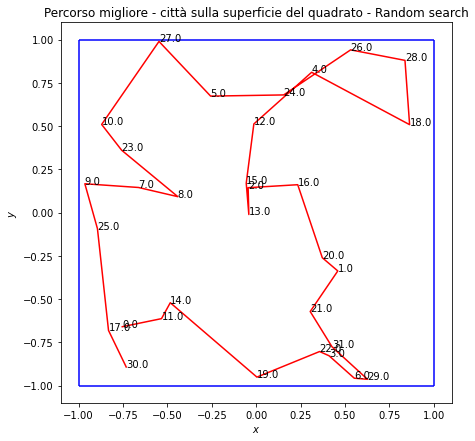

Lunghezza del percorso migliore:
3.96293


In [11]:
plt.figure(figsize=(7,7))
x = np.loadtxt("bestpath_rs_square.dat", usecols=0)
y = np.loadtxt("bestpath_rs_square.dat", usecols=1)
c = np.loadtxt("bestpath_rs_square.dat", usecols=2)
L = np.loadtxt("bestpath_rs_square.dat", usecols=3, max_rows=1)
t = np.linspace(-1,1,100)
plt.plot(x,y, color='red')
for i, txt in enumerate(c):
    plt.annotate(txt, (x[i], y[i]))
plt.hlines(-1, -1, 1, color='blue')
plt.hlines(1, -1, 1, color='blue')
plt.vlines(-1, -1, 1, color='blue')
plt.vlines(1, -1, 1, color='blue')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Percorso migliore - città sulla superficie del quadrato - Random search")
plt.grid(False)
plt.show()
print("Lunghezza del percorso migliore:")
print(L)

Procedendo con il solo *random search* per $60000$ iterazioni con un numero di individui nella popolazione di $100$, si ottiene il percorso sopra riportato. Esso è abbastanza buono ma presenta alcuni incroci.

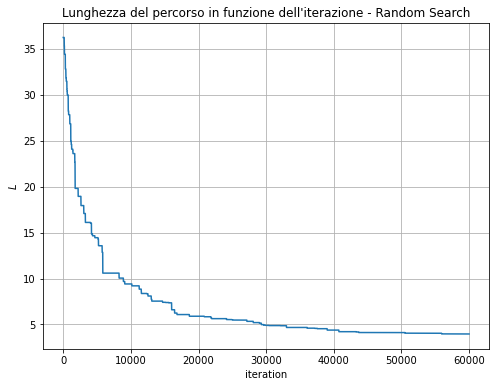

In [19]:
plt.figure(figsize=(8,6))
L = np.loadtxt("bestL_rs_square.dat")
x = np.arange(0,60001)

plt.plot(x, L)
plt.xlabel('iteration')
plt.ylabel('$L$')
plt.title("Lunghezza del percorso in funzione dell'iterazione - Random Search")
plt.grid(True)
plt.show()

Questo l'andamento del percorso migliore utilizzando solo gli operatori di mutazione agenti su un individuo scelto casualmente.

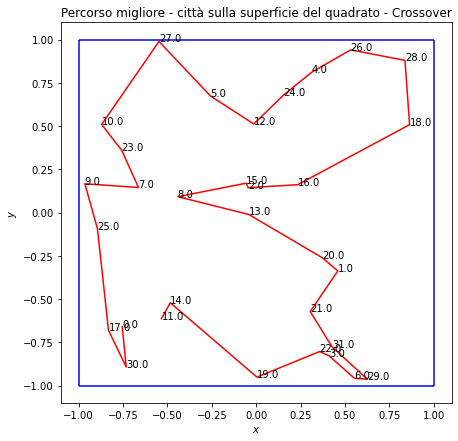

Lunghezza del percorso migliore:
3.77497


In [12]:
plt.figure(figsize=(7,7))
x = np.loadtxt("bestpath_square.dat", usecols=0)
y = np.loadtxt("bestpath_square.dat", usecols=1)
c = np.loadtxt("bestpath_square.dat", usecols=2)
L = np.loadtxt("bestpath_square.dat", usecols=3, max_rows=1)
t = np.linspace(-1,1,100)
plt.plot(x,y, color='red')
for i, txt in enumerate(c):
    plt.annotate(txt, (x[i], y[i]))
plt.hlines(-1, -1, 1, color='blue')
plt.hlines(1, -1, 1, color='blue')
plt.vlines(-1, -1, 1, color='blue')
plt.vlines(1, -1, 1, color='blue')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Percorso migliore - città sulla superficie del quadrato - Crossover")
plt.grid(False)
plt.show()
print("Lunghezza del percorso migliore:")
print(L)

In $20000$ iterazioni dell'algoritmo genetico con un numero di individui nella popolazione di $200$ questa volta (si nota infatti che con questo numero di individui l'algoritmo giunge a un risultato migliore nello stesso numero di iterazioni), si ottiene un percorso migliore del precedente e privo di incroci. Non c'è modo di stabilire se sia il migliore in assoluto, ma lo si può confrontare con quello ottenuto attraverso il *simulated annealing* nell'esercitazione $10$.

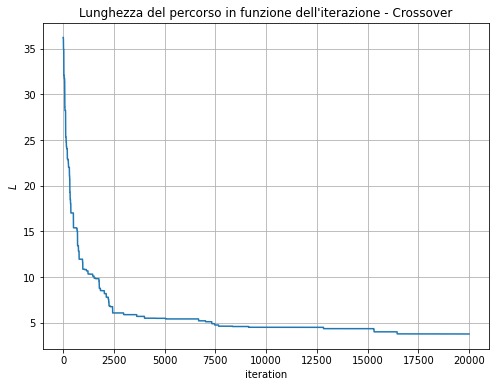

In [13]:
plt.figure(figsize=(8,6))
L = np.loadtxt("bestL_square.dat")
x = np.arange(0,20001)

plt.plot(x, L)
plt.xlabel('iteration')
plt.ylabel('$L$')
plt.title("Lunghezza del percorso in funzione dell'iterazione - Crossover")
plt.grid(True)
plt.show()

Si plotta la lunghezza del percorso migliore in funzione del numero di iterazioni. Anche in questo caso, l'algoritmo genetico trova un percorso migliore del *random search* in un tempo minore.

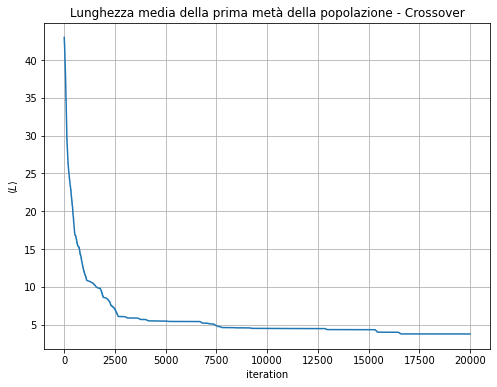

In [14]:
plt.figure(figsize=(8,6))
L = np.loadtxt("bestAveL_square.dat")
x = np.arange(0,20000)

plt.plot(x, L)
plt.xlabel('iteration')
plt.ylabel(r'$\langle L \rangle$')
plt.title("Lunghezza media della prima metà della popolazione - Crossover")
plt.grid(True)
plt.show()

Questa la media della lunghezza della prima metà della popolazione in funzione della generazione.